# QOSF Mentorship Program Screening Tasks



## Task 3 QSVM

Generate a Quantum Support Vector Machine (QSVM) using the iris dataset and try to
propose a kernel from a parametric quantum circuit to classify the three classes(setosa,
versicolor, virginica) using the one-vs-all format, the kernel only works as binary
classification. Identify the proposal with the lowest number of qubits and depth to obtain
higher accuracy. You can use the UU † format or using the Swap-Test.

In [1]:
# General Imports
import numpy as np

# Visualisation Imports
import matplotlib.pyplot as plt

# Scikit Imports
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier


# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit.providers.fake_provider import FakeMontrealV2


## Data Preprocessing, Scaling using Standard Scaler



In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [3]:
print([len(train_X), len(test_X)])

[120, 30]


In [4]:
train_X[0]

array([-1.50652052,  1.24920112, -1.56757623, -1.3154443 ])

### ZZFeatureMap

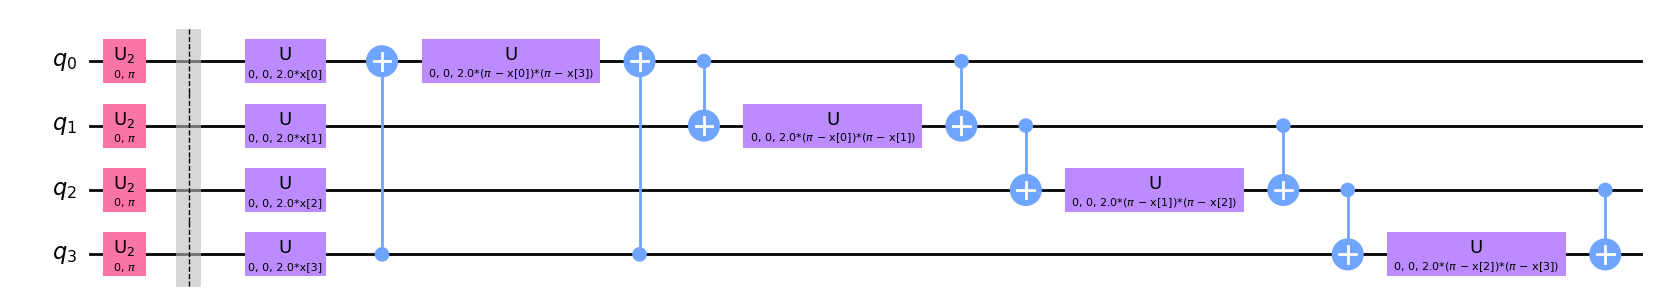

In [5]:
zz_map = ZZFeatureMap(feature_dimension=4, reps=1, entanglement='circular', insert_barriers=True)
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))
zz_map.decompose().decompose().draw(output='mpl')

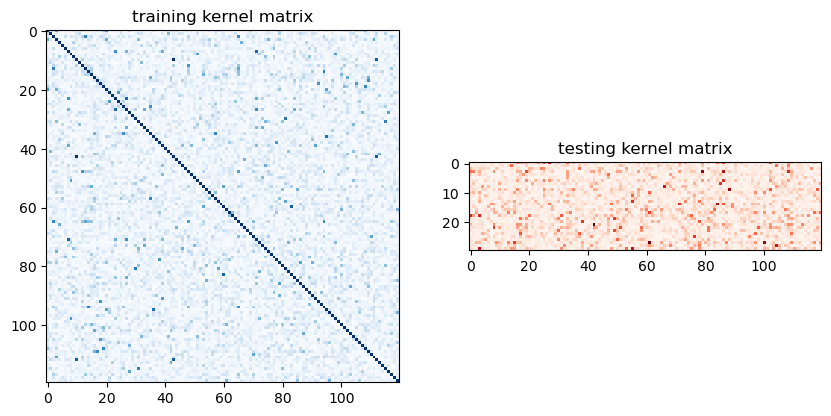

In [6]:
zz_matrix_train = zz_kernel.evaluate(x_vec=train_X)
zz_matrix_test = zz_kernel.evaluate(x_vec=test_X, y_vec=train_X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(zz_matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(zz_matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [7]:
zz_svc = SVC(kernel='precomputed')
zz_ovr = OneVsRestClassifier(zz_svc)
zz_ovr.fit(zz_matrix_train, train_y)
zz_score = zz_ovr.score(zz_matrix_test, test_y)

print(f'Precomputed kernel classification test score: {zz_score}')

Precomputed kernel classification test score: 0.6


In [8]:
zzcb_svc = SVC(kernel = zz_kernel.evaluate)
zzcb_ovr = OneVsRestClassifier(zzcb_svc)
zzcb_ovr.fit(train_X, train_y)
zzcb_score = zzcb_ovr.score(test_X, test_y)

print(f'Callable kernel classification test score: {zzcb_score}')

Callable kernel classification test score: 0.6


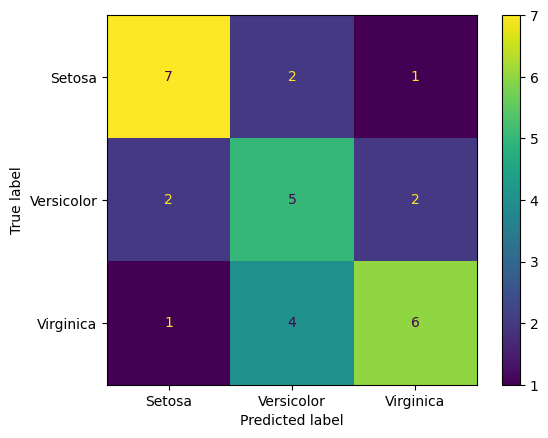

In [9]:
zz_cm = metrics.confusion_matrix(test_y, zzcb_ovr.predict(test_X))

zz_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = zz_cm, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

zz_cm_display.plot()
plt.show()

### PauliFeatureMap

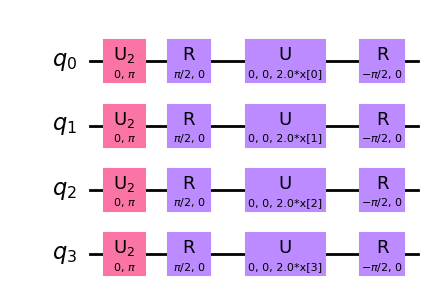

In [10]:
pauli_map = PauliFeatureMap(feature_dimension=4, reps=1, paulis = ['Y'])
pauli_kernel = QuantumKernel(feature_map=pauli_map, quantum_instance=Aer.get_backend('statevector_simulator'))
pauli_map.decompose().decompose().draw(output='mpl')


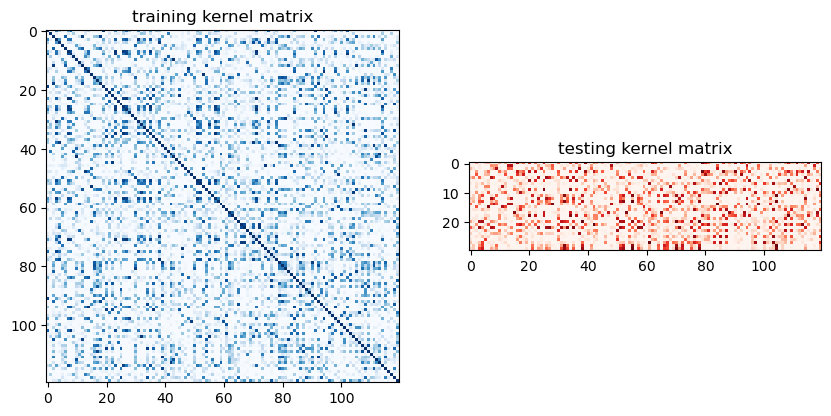

In [11]:
pauli_matrix_train = pauli_kernel.evaluate(x_vec=train_X)
pauli_matrix_test = pauli_kernel.evaluate(x_vec=test_X, y_vec=train_X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(pauli_matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(pauli_matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [12]:
pauli_svc = SVC(kernel='precomputed')
pauli_ovr = OneVsRestClassifier(pauli_svc)
pauli_ovr.fit(pauli_matrix_train, train_y)
pauli_score = pauli_ovr.score(pauli_matrix_test, test_y)

print(f'Precomputed kernel classification test score: {pauli_score}')

Precomputed kernel classification test score: 0.9666666666666667


In [13]:
paulicb_svc = SVC(kernel = pauli_kernel.evaluate)
paulicb_ovr = OneVsRestClassifier(paulicb_svc)
paulicb_ovr.fit(train_X, train_y)
paulicb_score = paulicb_ovr.score(test_X, test_y)

print(f'Callable kernel classification test score: {paulicb_score}')

Callable kernel classification test score: 0.9666666666666667


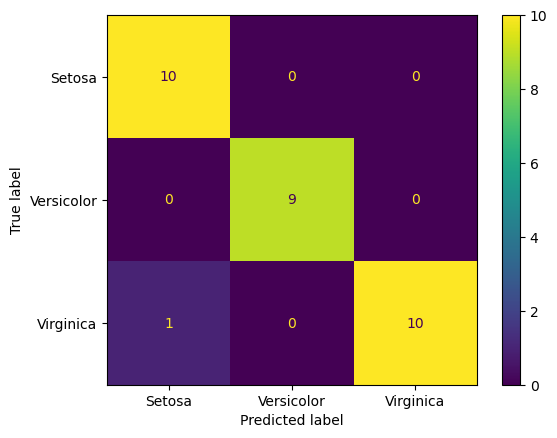

In [14]:
pauli_cm = metrics.confusion_matrix(test_y, paulicb_ovr.predict(test_X))

pauli_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = pauli_cm, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

pauli_cm_display.plot()
plt.show()

### ZFeatureMap


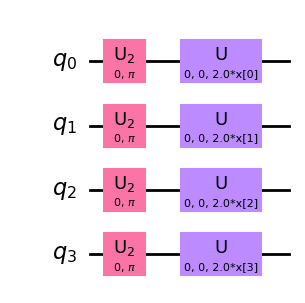

In [15]:
z_map = ZFeatureMap(feature_dimension=4, reps=1)
z_kernel = QuantumKernel(feature_map=z_map, quantum_instance=Aer.get_backend('statevector_simulator'))
z_map.decompose().decompose().draw(output='mpl')


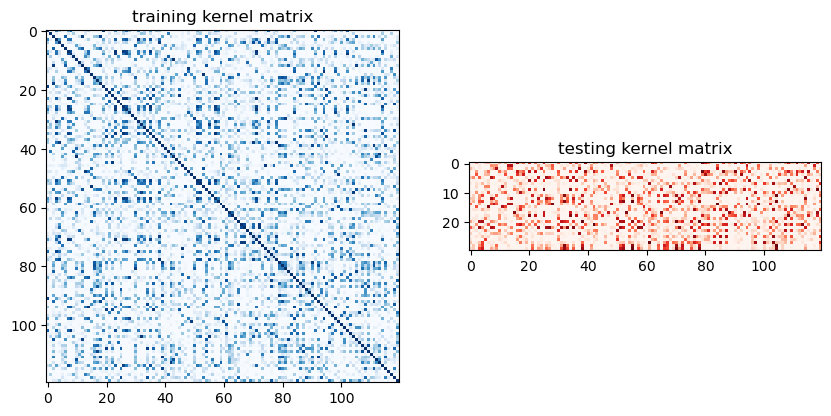

In [16]:
z_matrix_train = z_kernel.evaluate(x_vec=train_X)
z_matrix_test = z_kernel.evaluate(x_vec=test_X, y_vec=train_X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(z_matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(z_matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [17]:
z_svc = SVC(kernel='precomputed')
z_ovr = OneVsRestClassifier(z_svc)
z_ovr.fit(z_matrix_train, train_y)
z_score = z_ovr.score(z_matrix_test, test_y)

print(f'Precomputed kernel classification test score: {z_score}')

Precomputed kernel classification test score: 0.9666666666666667


In [18]:
zcb_svc = SVC(kernel = z_kernel.evaluate)
zcb_ovr = OneVsRestClassifier(zcb_svc)
zcb_ovr.fit(train_X, train_y)
zcb_score = zcb_ovr.score(test_X, test_y)

print(f'Callable kernel classification test score: {zcb_score}')

Callable kernel classification test score: 0.9666666666666667


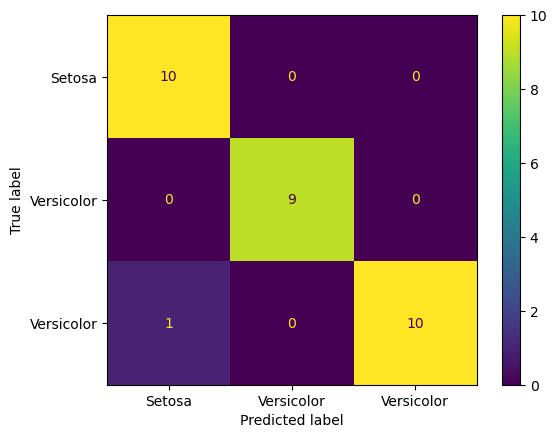

In [19]:
z_cm = metrics.confusion_matrix(test_y, zcb_ovr.predict(test_X))

z_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = z_cm, display_labels = ['Setosa', 'Versicolor', 'Versicolor'])

z_cm_display.plot()
plt.show()

## Data Preprocessing, Scaling using MinMaxScaler

In [20]:
mm_scaler = MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X)
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### ZZFeatureMap

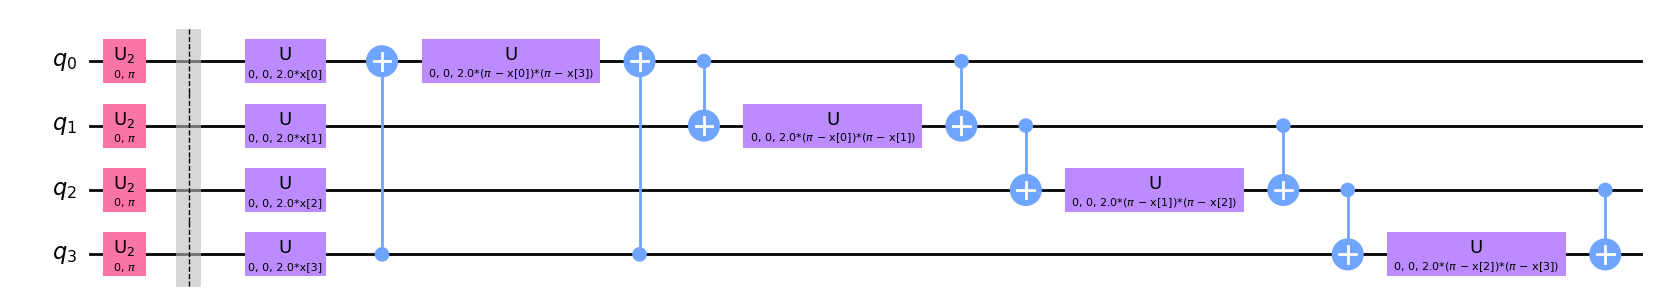

In [21]:
zz_map = ZZFeatureMap(feature_dimension=4, reps=1, entanglement='circular', insert_barriers=True)
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))
zz_map.decompose().decompose().draw(output='mpl')

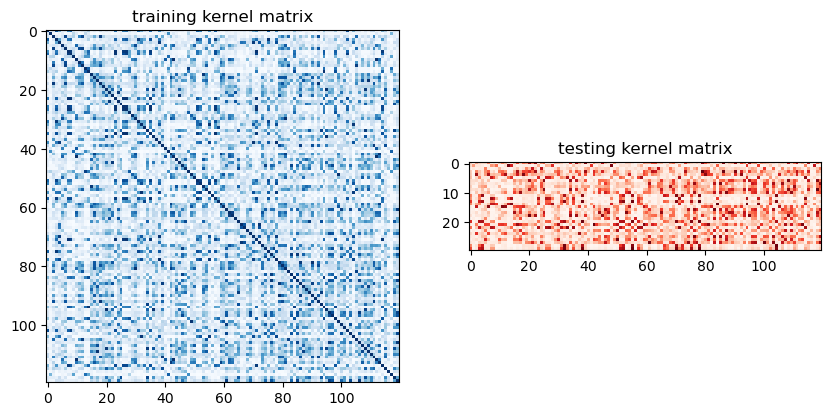

In [22]:
zz_matrix_train = zz_kernel.evaluate(x_vec=train_X)
zz_matrix_test = zz_kernel.evaluate(x_vec=test_X, y_vec=train_X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(zz_matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(zz_matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [23]:
zz_svc = SVC(kernel='precomputed')
zz_ovr = OneVsRestClassifier(zz_svc)
zz_ovr.fit(zz_matrix_train, train_y)
zz_score = zz_ovr.score(zz_matrix_test, test_y)

print(f'Precomputed kernel classification test score: {zz_score}')

Precomputed kernel classification test score: 0.9333333333333333


In [24]:
zzcb_svc = SVC(kernel = zz_kernel.evaluate)
zzcb_ovr = OneVsRestClassifier(zzcb_svc)
zzcb_ovr.fit(train_X, train_y)
zzcb_score = zzcb_ovr.score(test_X, test_y)

print(f'Callable kernel classification test score: {zzcb_score}')

Callable kernel classification test score: 0.9333333333333333


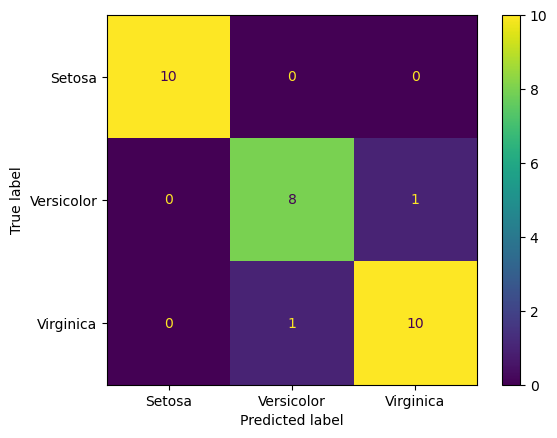

In [25]:
zz_cm = metrics.confusion_matrix(test_y, zzcb_ovr.predict(test_X))

zz_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = zz_cm, display_labels = ['Setosa','Versicolor','Virginica'])

zz_cm_display.plot()
plt.show()

### PauliFeatureMap


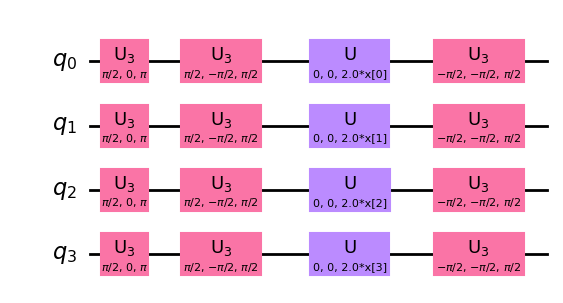

In [26]:
pauli_map = PauliFeatureMap(feature_dimension=4, reps=1, paulis = ['Y'])
pauli_kernel = QuantumKernel(feature_map=pauli_map, quantum_instance=Aer.get_backend('statevector_simulator'))
pauli_map.decompose().decompose().decompose().draw(output='mpl')

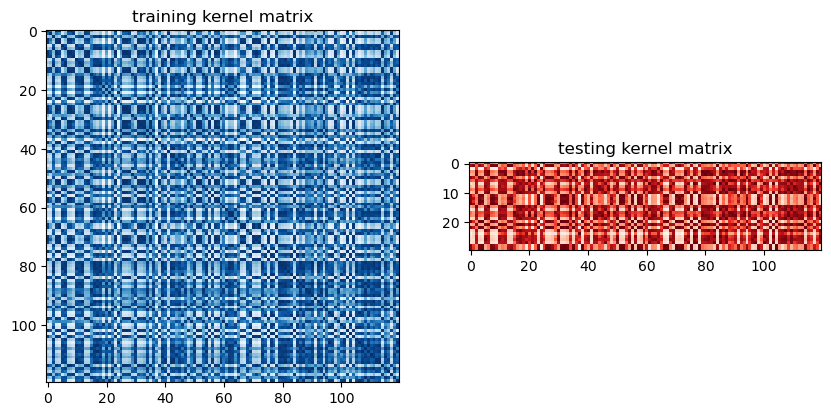

In [27]:
pauli_matrix_train = pauli_kernel.evaluate(x_vec=train_X)
pauli_matrix_test = pauli_kernel.evaluate(x_vec=test_X, y_vec=train_X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(pauli_matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(pauli_matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [28]:
pauli_svc = SVC(kernel='precomputed')
pauli_ovr = OneVsRestClassifier(pauli_svc)
pauli_ovr.fit(pauli_matrix_train, train_y)
pauli_score = pauli_ovr.score(pauli_matrix_test, test_y)

print(f'Precomputed kernel classification test score: {pauli_score}')

Precomputed kernel classification test score: 1.0


In [29]:
paulicb_svc = SVC(kernel = pauli_kernel.evaluate)
paulicb_ovr = OneVsRestClassifier(paulicb_svc)
paulicb_ovr.fit(train_X, train_y)
paulicb_score = paulicb_ovr.score(test_X, test_y)

print(f'Callable kernel classification test score: {paulicb_score}')

Callable kernel classification test score: 1.0


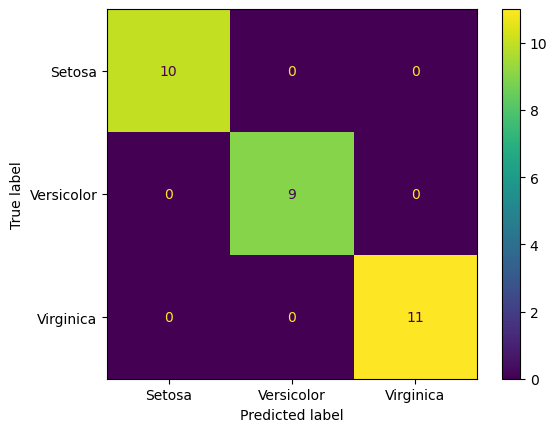

In [30]:
pauli_cm = metrics.confusion_matrix(test_y, paulicb_ovr.predict(test_X))

pauli_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = pauli_cm, display_labels = ['Setosa','Versicolor','Virginica'])

pauli_cm_display.plot()
plt.show()

### ZFeatureMap

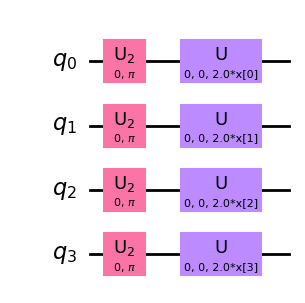

In [31]:
z_map = ZFeatureMap(feature_dimension=4, reps=1)
z_kernel = QuantumKernel(feature_map=z_map, quantum_instance=Aer.get_backend('statevector_simulator'))
z_map.decompose().decompose().draw(output='mpl')

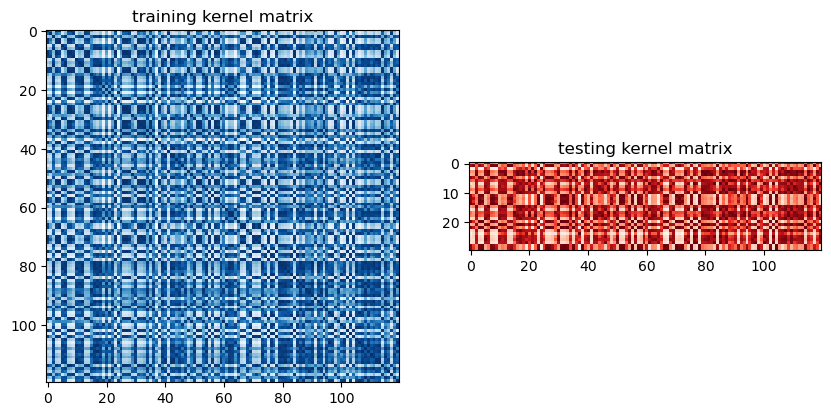

In [32]:
z_matrix_train = z_kernel.evaluate(x_vec=train_X)
z_matrix_test = z_kernel.evaluate(x_vec=test_X, y_vec=train_X)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(z_matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("training kernel matrix")
axs[1].imshow(np.asmatrix(z_matrix_test),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("testing kernel matrix")
plt.show()

In [33]:
z_svc = SVC(kernel='precomputed')
z_ovr = OneVsRestClassifier(z_svc)
z_ovr.fit(z_matrix_train, train_y)
z_score = z_ovr.score(z_matrix_test, test_y)

print(f'Precomputed kernel classification test score: {z_score}')

Precomputed kernel classification test score: 1.0


In [34]:
zcb_svc = SVC(kernel = z_kernel.evaluate)
zcb_ovr = OneVsRestClassifier(zcb_svc)
zcb_ovr.fit(train_X, train_y)
zcb_score = zcb_ovr.score(test_X, test_y)

print(f'Callable kernel classification test score: {zcb_score}')

Callable kernel classification test score: 1.0


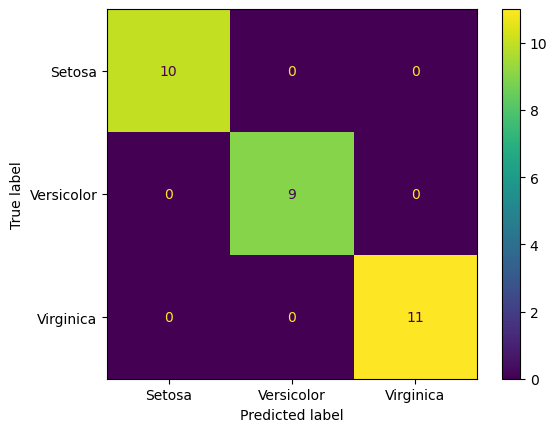

In [35]:
z_cm = metrics.confusion_matrix(test_y, zcb_ovr.predict(test_X))

z_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = z_cm, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

z_cm_display.plot()
plt.show()

## Conclusion 

After investigating the effect of three different quantum feature maps (ZZFeatureMap, PauliFeatureMap, and ZFeatureMap) to encode classical data for QSVM and also considering two scaling methods, which is the StandardScaler and the MinMaxScaler, we find that the best QSVM algorithm for Iris dataset classification is the algorithm that uses ZFeatureMap as the feature map and MinMaxScaler as the scaling method. We can see that each feature map that being used in this investigation has depth as follow

In [36]:
print("ZZ depth : "+str(zz_map.decompose().decompose().depth()))
print("Pauli depth : "+str(pauli_map.decompose().decompose().depth()))
print("Z depth : "+str(z_map.decompose().decompose().depth()))

ZZ depth : 14
Pauli depth : 4
Z depth : 2


As we see, to obtain a high accuracy for QSVM, the ZFeatureMap only needs depth of two. Therefore, we conclude that ZFeatureMap with MinMaxScaler is the best combination for QSVM to classify Iris data.